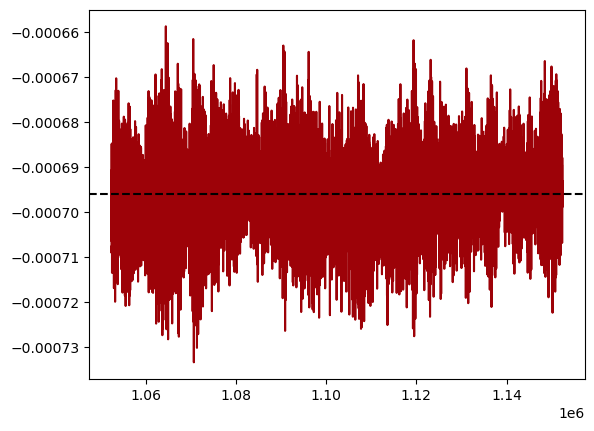

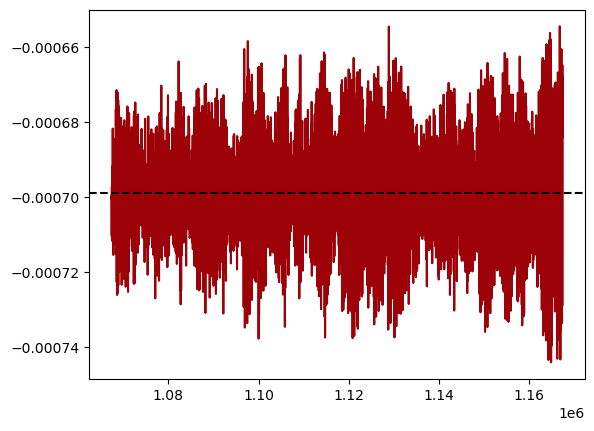

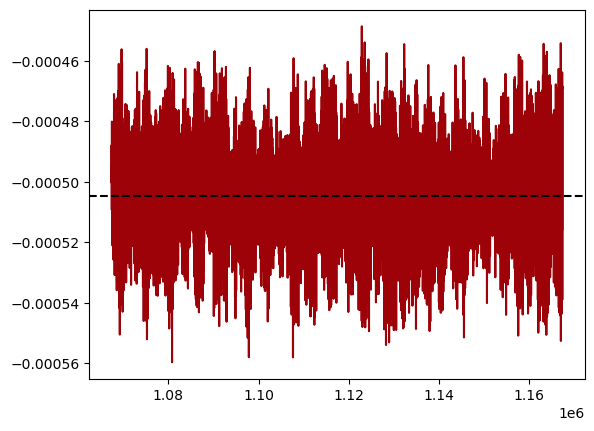

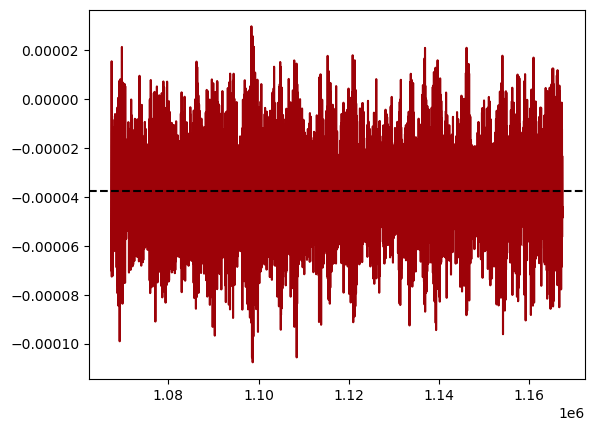

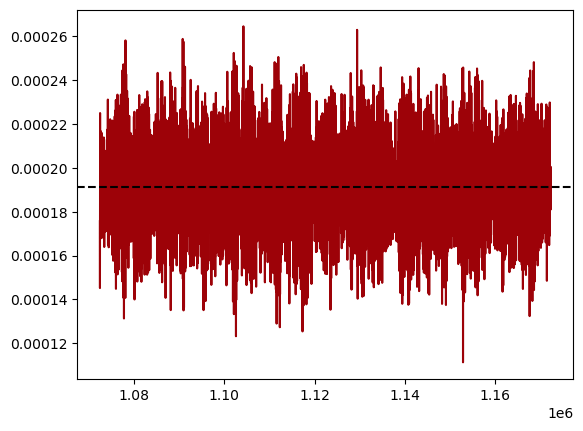

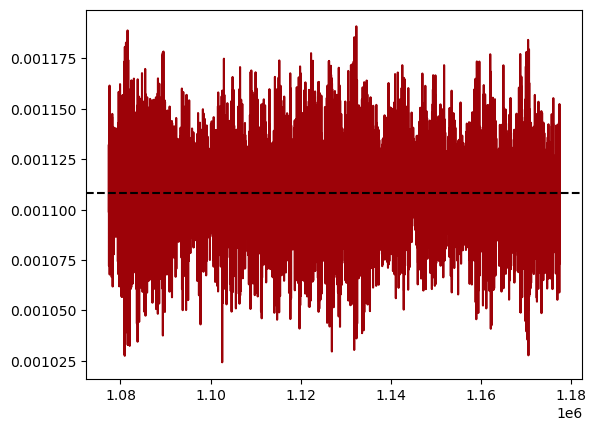

[-0.0006960107764065888, -0.0006988777245462026, -0.0005045056181645553, -3.774201379158113e-05, 0.0001912112647634661, 0.0011080624317742912]


In [1]:
import matplotlib.pyplot as plt
import statistics

pressures = [1, 2, 3, 4, 5, 6]
pressure_means = []
stdevs = []

for pressure in pressures:
    directory = 'D:/MSc/summer_project/p' + str(pressure)
    file_path = directory + '/pressure.out'
    with open(file_path, 'r') as file:
        data = file.readlines()
        x_values = []
        y_values = []
        for line in data:
            x, y = map(float, line.split())  # Split the line and convert to floats
            x_values.append(x)
            y_values.append(y)
        mean = statistics.mean(y_values)
        stdev = statistics.stdev(y_values)
        pressure_means.append(mean)
        stdevs.append(stdev)
        plt.plot(x_values, y_values, label = pressure, color = '#9d0208')
        plt.axhline(mean, color='black', linestyle='dashed')#, label='Mean')
        plt.show()

cell_lengths = [33.7316000000000, 32.0000000000000, 30.0000000000000, 28.4944116841394, 28.0563780094177, 26.8879850364710]
volumes = [length **3 for length in cell_lengths]
print(pressure_means)

# with open('P_V_data.txt', 'w') as file:
#     file.write('P\tp_au\tstdev_p_au\tcell_length_au\tvolume_au\n')
#     for x in zip(pressures, pressure_means, stdevs, cell_lengths, volumes):
#         file.write("{0}\t{1}\t{2}\t{3}\t{4}\n".format(*x))

In [1]:
pressures_au = []
stdevs_au = []

with open("d:/msc/summer_project/P_V_data.txt", "r") as file:
    # Read the first line (titles) and ignore it
    titles = file.readline()

    # Iterate through each remaining line in the file
    for line in file:
        # Split the line into columns using tab as the delimiter
        values_in_this_line = line.strip().split("\t")
        value_in_second_column = float(values_in_this_line[1])
        value_in_third_column = float(values_in_this_line[2])
        pressures_au.append(value_in_second_column)
        stdevs_au.append(value_in_third_column)

pressures_GPa = [x* 2.9421015697e4 for x in pressures_au]
stdevs_GPa = [x* 2.9421015697e4 for x in stdevs_au]

cell_lengths_au = [33.7316000000000, 32.0000000000000, 30.0000000000000, 28.4944116841394, 28.0563780094177, 26.8879850364710]
cell_lengths_angstrom = [x*0.529177249 for x in cell_lengths_au]
volumes = [length **3 for length in cell_lengths_angstrom]

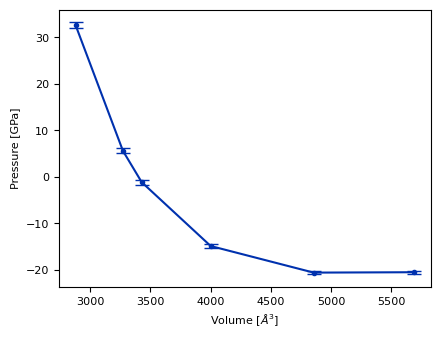

In [7]:
from matplotlib import pyplot as plt

fig, ax = plt.subplots()
blue_colour = '#0031ae'
ax.plot(volumes, pressures_GPa, color=blue_colour, label='Data')
ax.errorbar(volumes, pressures_GPa, yerr=stdevs_GPa, fmt='.', capsize=5, color=blue_colour)


font_size = 8
plt.xticks(fontsize=font_size)
plt.yticks(fontsize=font_size)
ax.set_xlabel('Volume [$Å^3$]', fontsize=font_size)
ax.set_ylabel('Pressure [GPa]', fontsize=font_size)
#ax.set_title('Pressure vs. Volume')

fig.set_size_inches(4*1.2, 3*1.2)
fig.savefig('D:/MSc/summer_project/P_V.png', dpi=500)

plt.show()